For the next step, we will create the prediction model of credit card eligibility.

The prediction model will use all of the payment features to predict the target ['default payment next month'].

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

In [2]:
df = pd.read_csv('/content/cc_cleaned.csv')

**Exploring Data**

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,False,False,False,True
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,False,False,False,True
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,False,False,False,True
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,False,False,False,True
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,False,False,False,True


In [4]:
# Exploring response column
df['default payment next month'].mean()

np.float64(0.2217971797179718)

In [5]:
df.groupby('default payment next month')['ID'].count()

,ID
default payment next month,
0,20750
1,5914


Total is 26664

- **1**: 22% | not balanced
- **0**: 78% | balanced

The data is skewed to the balanced one. But, the data is not particularly imbalanced.

So, we will proceed with this questions:
- Is the data complete? Any missing data there?
- Is the data consistent? Does the distribution change over time, and if so, is this expected?
- Does the data make sense? Does the value of each features and response fit with the definition from the data dictionary?

I think, based on our last exploration, we can answer the questions above. All of the questioned problems had already answered there https://github.com/asynchronouscoffee/credit-card-exploration/blob/main/Credit_Card_Analysis.ipynb

Now, we can proceed to the next step.

**Machine Learning Application**

We will use Logistic Regression Algorithm to tacke classification problem

In [6]:
# Import the library
from sklearn.linear_model import LogisticRegression

In [7]:
lr = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0,
                        fit_intercept=True, intercept_scaling=1, class_weight=None,
                        random_state=None, solver='lbfgs', max_iter=100, multi_class='auto',
                        verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

We will do fitting data with the first 10 of example feature (EDUCATION)

In [8]:
X = df['EDUCATION'][:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]])

In [9]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
# Fitting the data
lr.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='auto')

In [11]:
# Make data prediction
p_X = df['EDUCATION'][10:20].values.reshape(-1,1)
p_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]])

In [12]:
# Make prediction
lr.predict(p_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
# Call the original data
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

We can see that the prediction is 80% accurate.

**Generating Synthetic Data**

This data will be used to train a linear regression model

In [14]:
from numpy.random import default_rng

In [15]:
rg = default_rng(12345)
X = rg.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([2.27336022, 3.1675834 , 7.97365457, 6.76254671, 3.91109551,
       3.32813928, 5.98308754, 1.86734186, 6.72756044, 9.41802865])

Now, we need to generate the data for target or response variable. The data need to be have linear trend against the feature (because of linear regression, of course), but have normally distributed error:

𝑦 = 𝛼𝑥 + 𝘣 + 𝑁(𝜇,𝜎) -> Linear equation with Gaussian noise

𝛼 is the slope, 𝘣 is the intercept, and for Gaussian noise it has a mean of 𝜇 with standard deviation of 𝜎. So, the prediction of 𝑦, si resulted from a calculation of slope times the feature array of 𝑥, plus some Gaussian noise(using Numpy in this case), and an intercept.

The noise will be an array of 1000 data points with the same shape as the feature array 𝑥, where the mean of the noise(loc) is 0 and the standard deviation(scale) is 1. This will spread the data a little bit.

In [16]:
# Generating y synthetic data
slope = 0.25
intercept = -1.25
y = slope * X + rg.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

Text(0, 0.5, 'y')

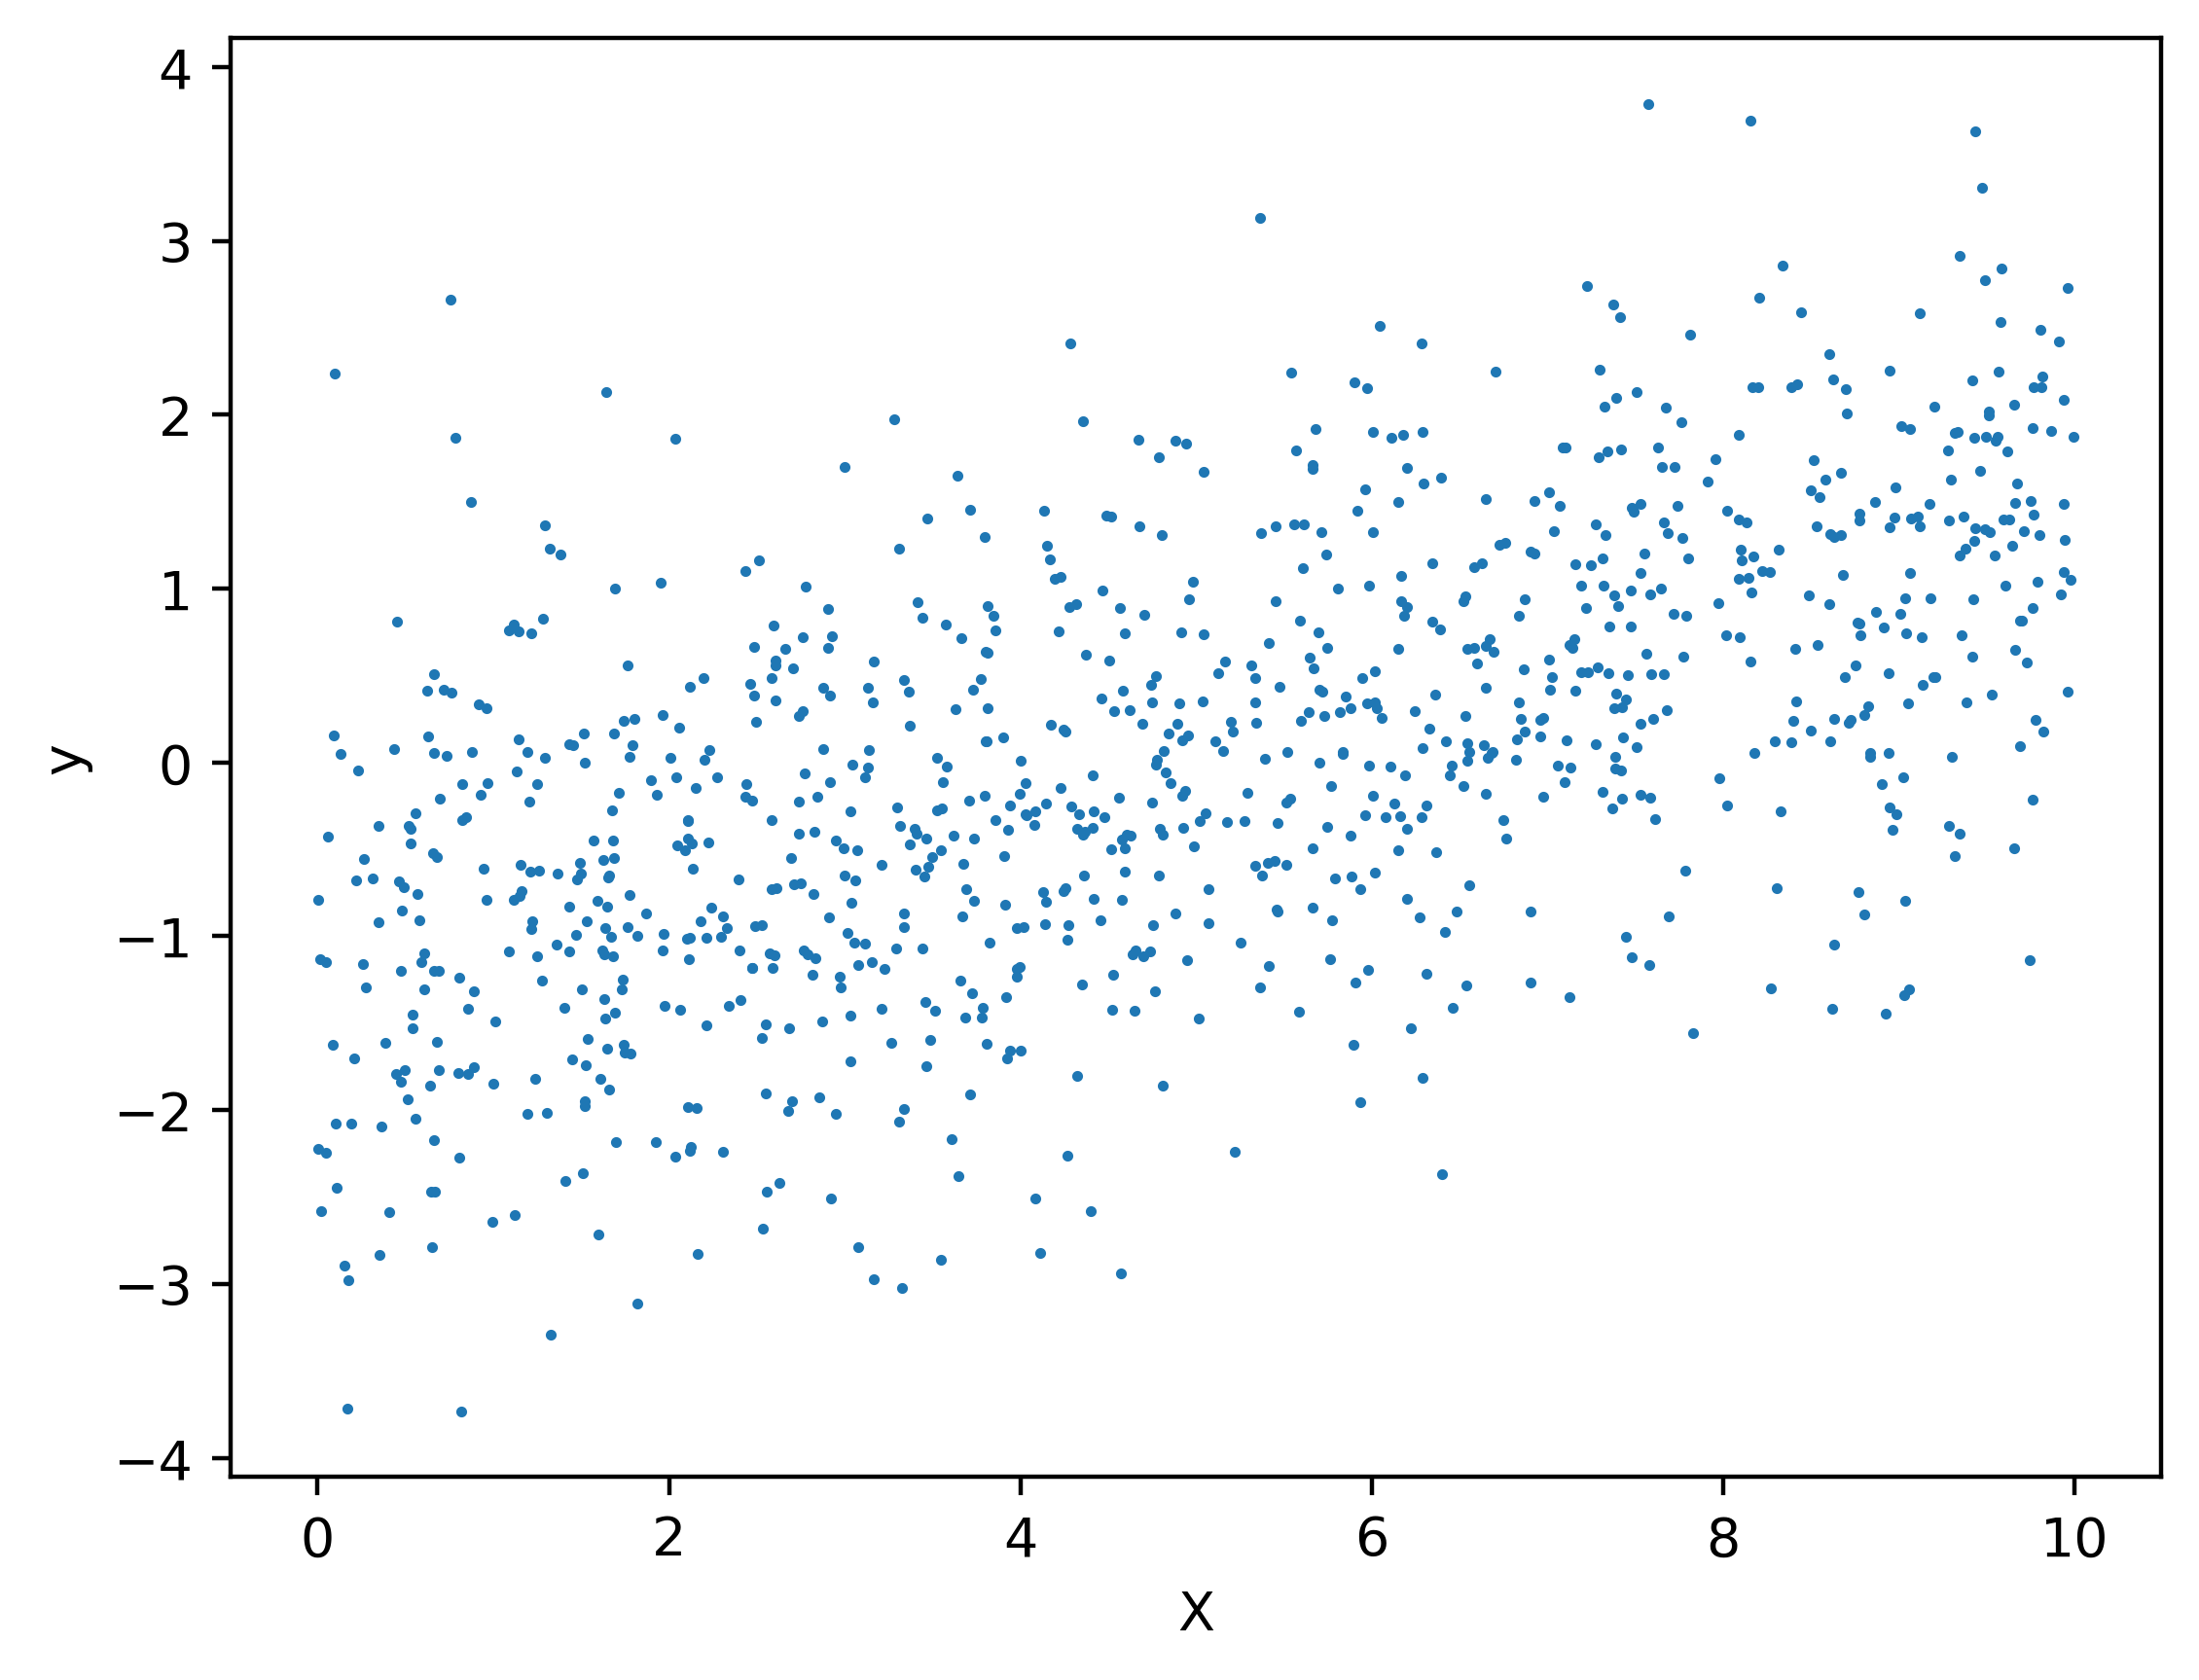

In [17]:
plt.scatter(X, y, s=1)
plt.xlabel('X')
plt.ylabel('y')

**Testing Linear Regression Model**

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lin_r = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None)
lin_r

LinearRegression()

In [20]:
# Fit the data
lin_r.fit(X.reshape(-1,1), y)
print(lin_r.intercept_)
print(lin_r.coef_)

-1.2522197212675916
[0.25711689]


In [21]:
y_pred = lin_r.predict(X.reshape(-1,1))

Text(0, 0.5, 'y')

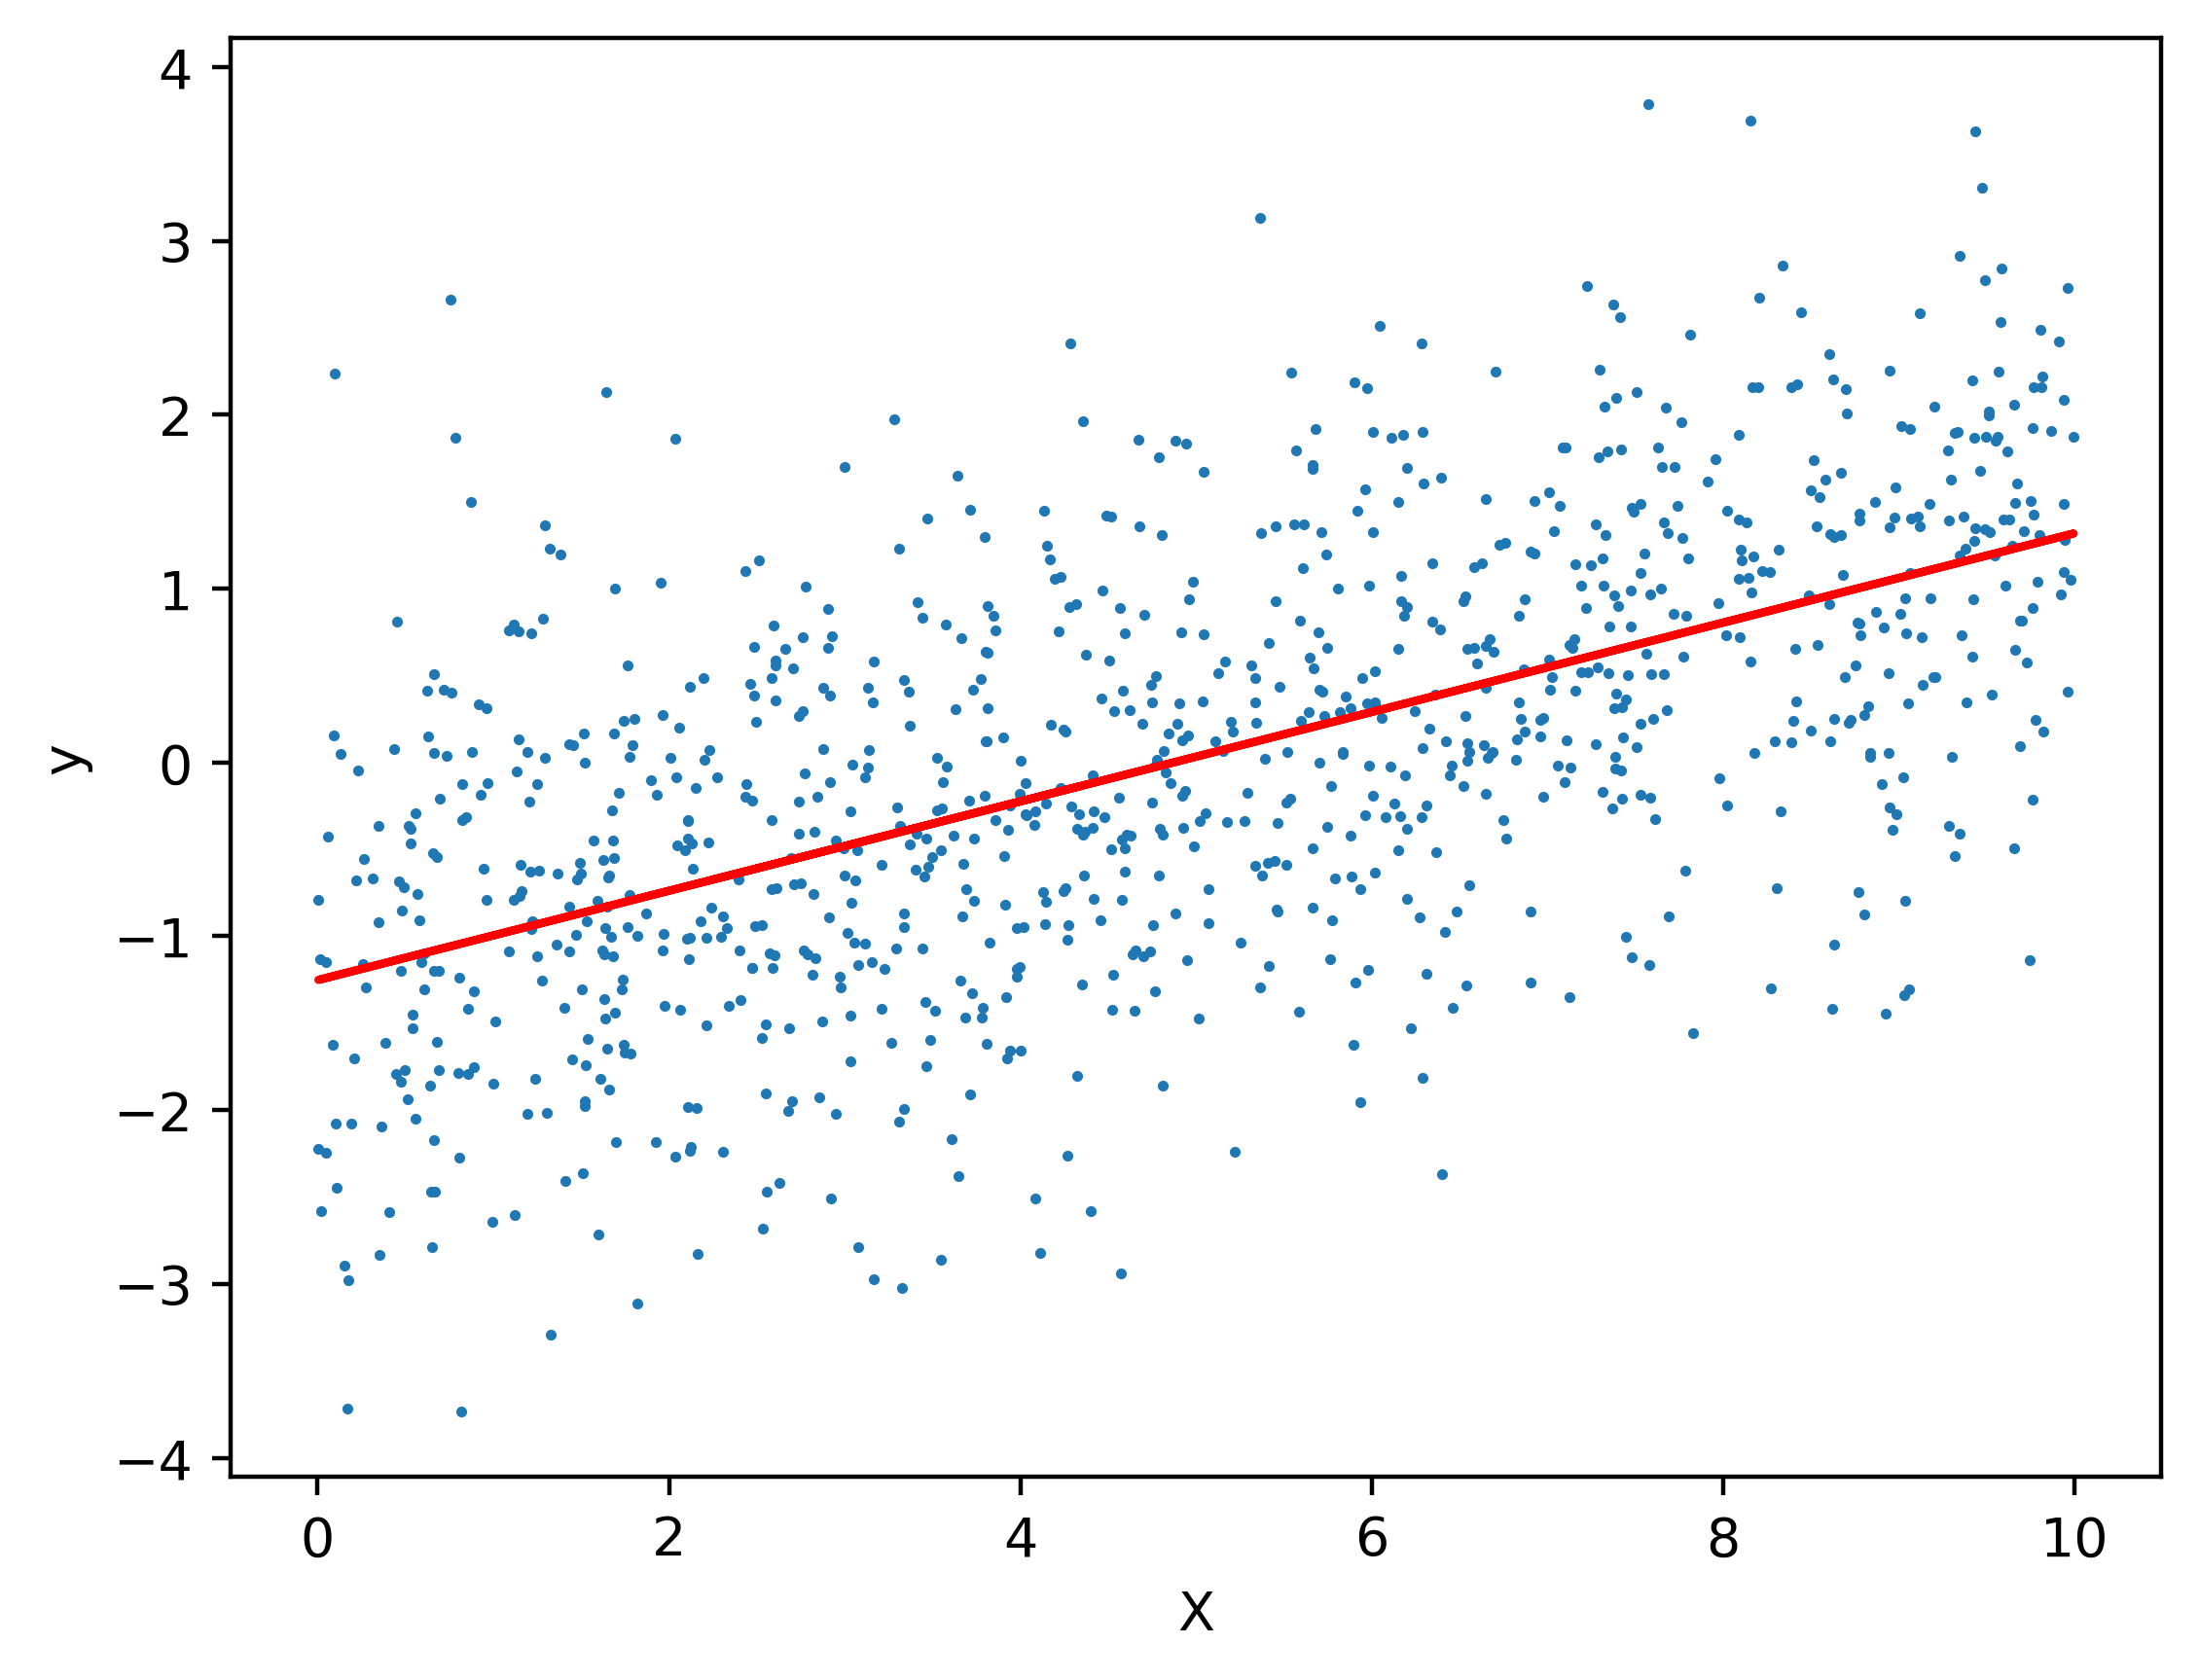

In [22]:
plt.scatter(X, y, s=1)
plt.plot(X, y_pred, 'r')
plt.xlabel('X')
plt.ylabel('y')

It seems the model is a good fit in the data.

**Splitting The Data**

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df['EDUCATION'].values.reshape(-1,1),
                                                    df['default payment next month'].values, test_size=0.2, random_state=24)

Split the data to 80% training data and 20% test data.

The **random_state** parameter is the random number seed. This parameter allows a consistent train/test split across runs in this notebook.

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [26]:
print(np.mean(y_train))
print(np.mean(y_test))

0.223102526838873
0.21657603600225014


The positive class fraction in the training and test data is about 22%. We can say this is good, we can say that the training set represent the test set.

**Applying Logistic Regression to the Cleaned CC Data**

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log_r = LogisticRegression(C=0.1, class_weight=None, dual=False,
                           fit_intercept=True, intercept_scaling=1, max_iter=100,
                           multi_class='auto', n_jobs=None, penalty='l2',
                           random_state=None, solver='liblinear', tol=0.0001,
                           verbose=0, warm_start=False)

In [29]:
# Fit the data
log_r.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.1, multi_class='auto', solver='liblinear')

In [30]:
# Making prediction
y_pred = log_r.predict(X_test)

In [31]:
# Logical mask to measure model accuracy
acc = y_pred == y_test

In [32]:
np.mean(acc)

np.float64(0.7834239639977498)

So, roughly the model accuracy is 78%

In [33]:
# Using .score to measure accuracy
log_r.score(X_test, y_test)

0.7834239639977498

In [34]:
from sklearn import metrics

In [35]:
# Use metric from sklearn to measure accuracy
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

All of the metric above consistently showing the accuracy score of 78%

**Demonstration of Confusion Matrix**

CM is used to measure classification model performance. In this demonstration, I will use EDUCATION feature from cleaned CC Data.

In [36]:
# Sum total of positive samples
P = sum(y_test)
P

np.int64(1155)

In [37]:
# Sum of True Positive
TP = sum((y_test==1) & (y_pred==1))
TP

np.int64(0)

In [38]:
TPR = TP/P
TPR

np.float64(0.0)

It seems the model doesn't predict positive samples.

In [39]:
# Sum FN
FN = sum((y_test==1) & (y_pred==0))
FN

np.int64(1155)

In [40]:
FNR = FN/P
FNR

np.float64(1.0)

The model is misclassified the positive samples to negative samples.

In [41]:
# Sum of Neg samples
N = sum(y_test==0)
N

np.int64(4178)

In [42]:
# Calc TN
TN = sum((y_test==0) & (y_pred==0))
TN

np.int64(4178)

In [43]:
# Calc False Positive
FP = sum((y_test==0) & (y_pred==1))
FP

np.int64(0)

In [44]:
# Calc TNR & FPR
TNR = TN/N
FPR = FP/N
print(f'TNR is:{TNR} | FPR is: {FPR}')

TNR is:1.0 | FPR is: 0.0


The model is correctly predictied all negative samples as negative.

The model is behave like the majority-class null model for all samples, both positive and negative. Need a better model.

The other method to run confusion matrix is use scikit-learn library.

In [45]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]])

**Examining Logistic Regression**

Logistic regression work using probability, 0 -> 1 value, of certain class of samples. There is a threshold of it, like the model will label positive when probability is >= 5, and negative when < 5. In scikit learn, the default value of the threshold is 5.

In [46]:
# Use .predic_proba to return prediction in array
y_pred_proba = log_r.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

We can see the prediction of classes.

In [47]:
# Check wether the array value when summed is 1
proba_sum = np.sum(y_pred_proba, 1)
proba_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [48]:
np.unique(proba_sum)

array([1.])

Yep, all valid

Now then, let's capture the second value, positive class

In [49]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

Text(0, 0.5, 'Number of Samples')

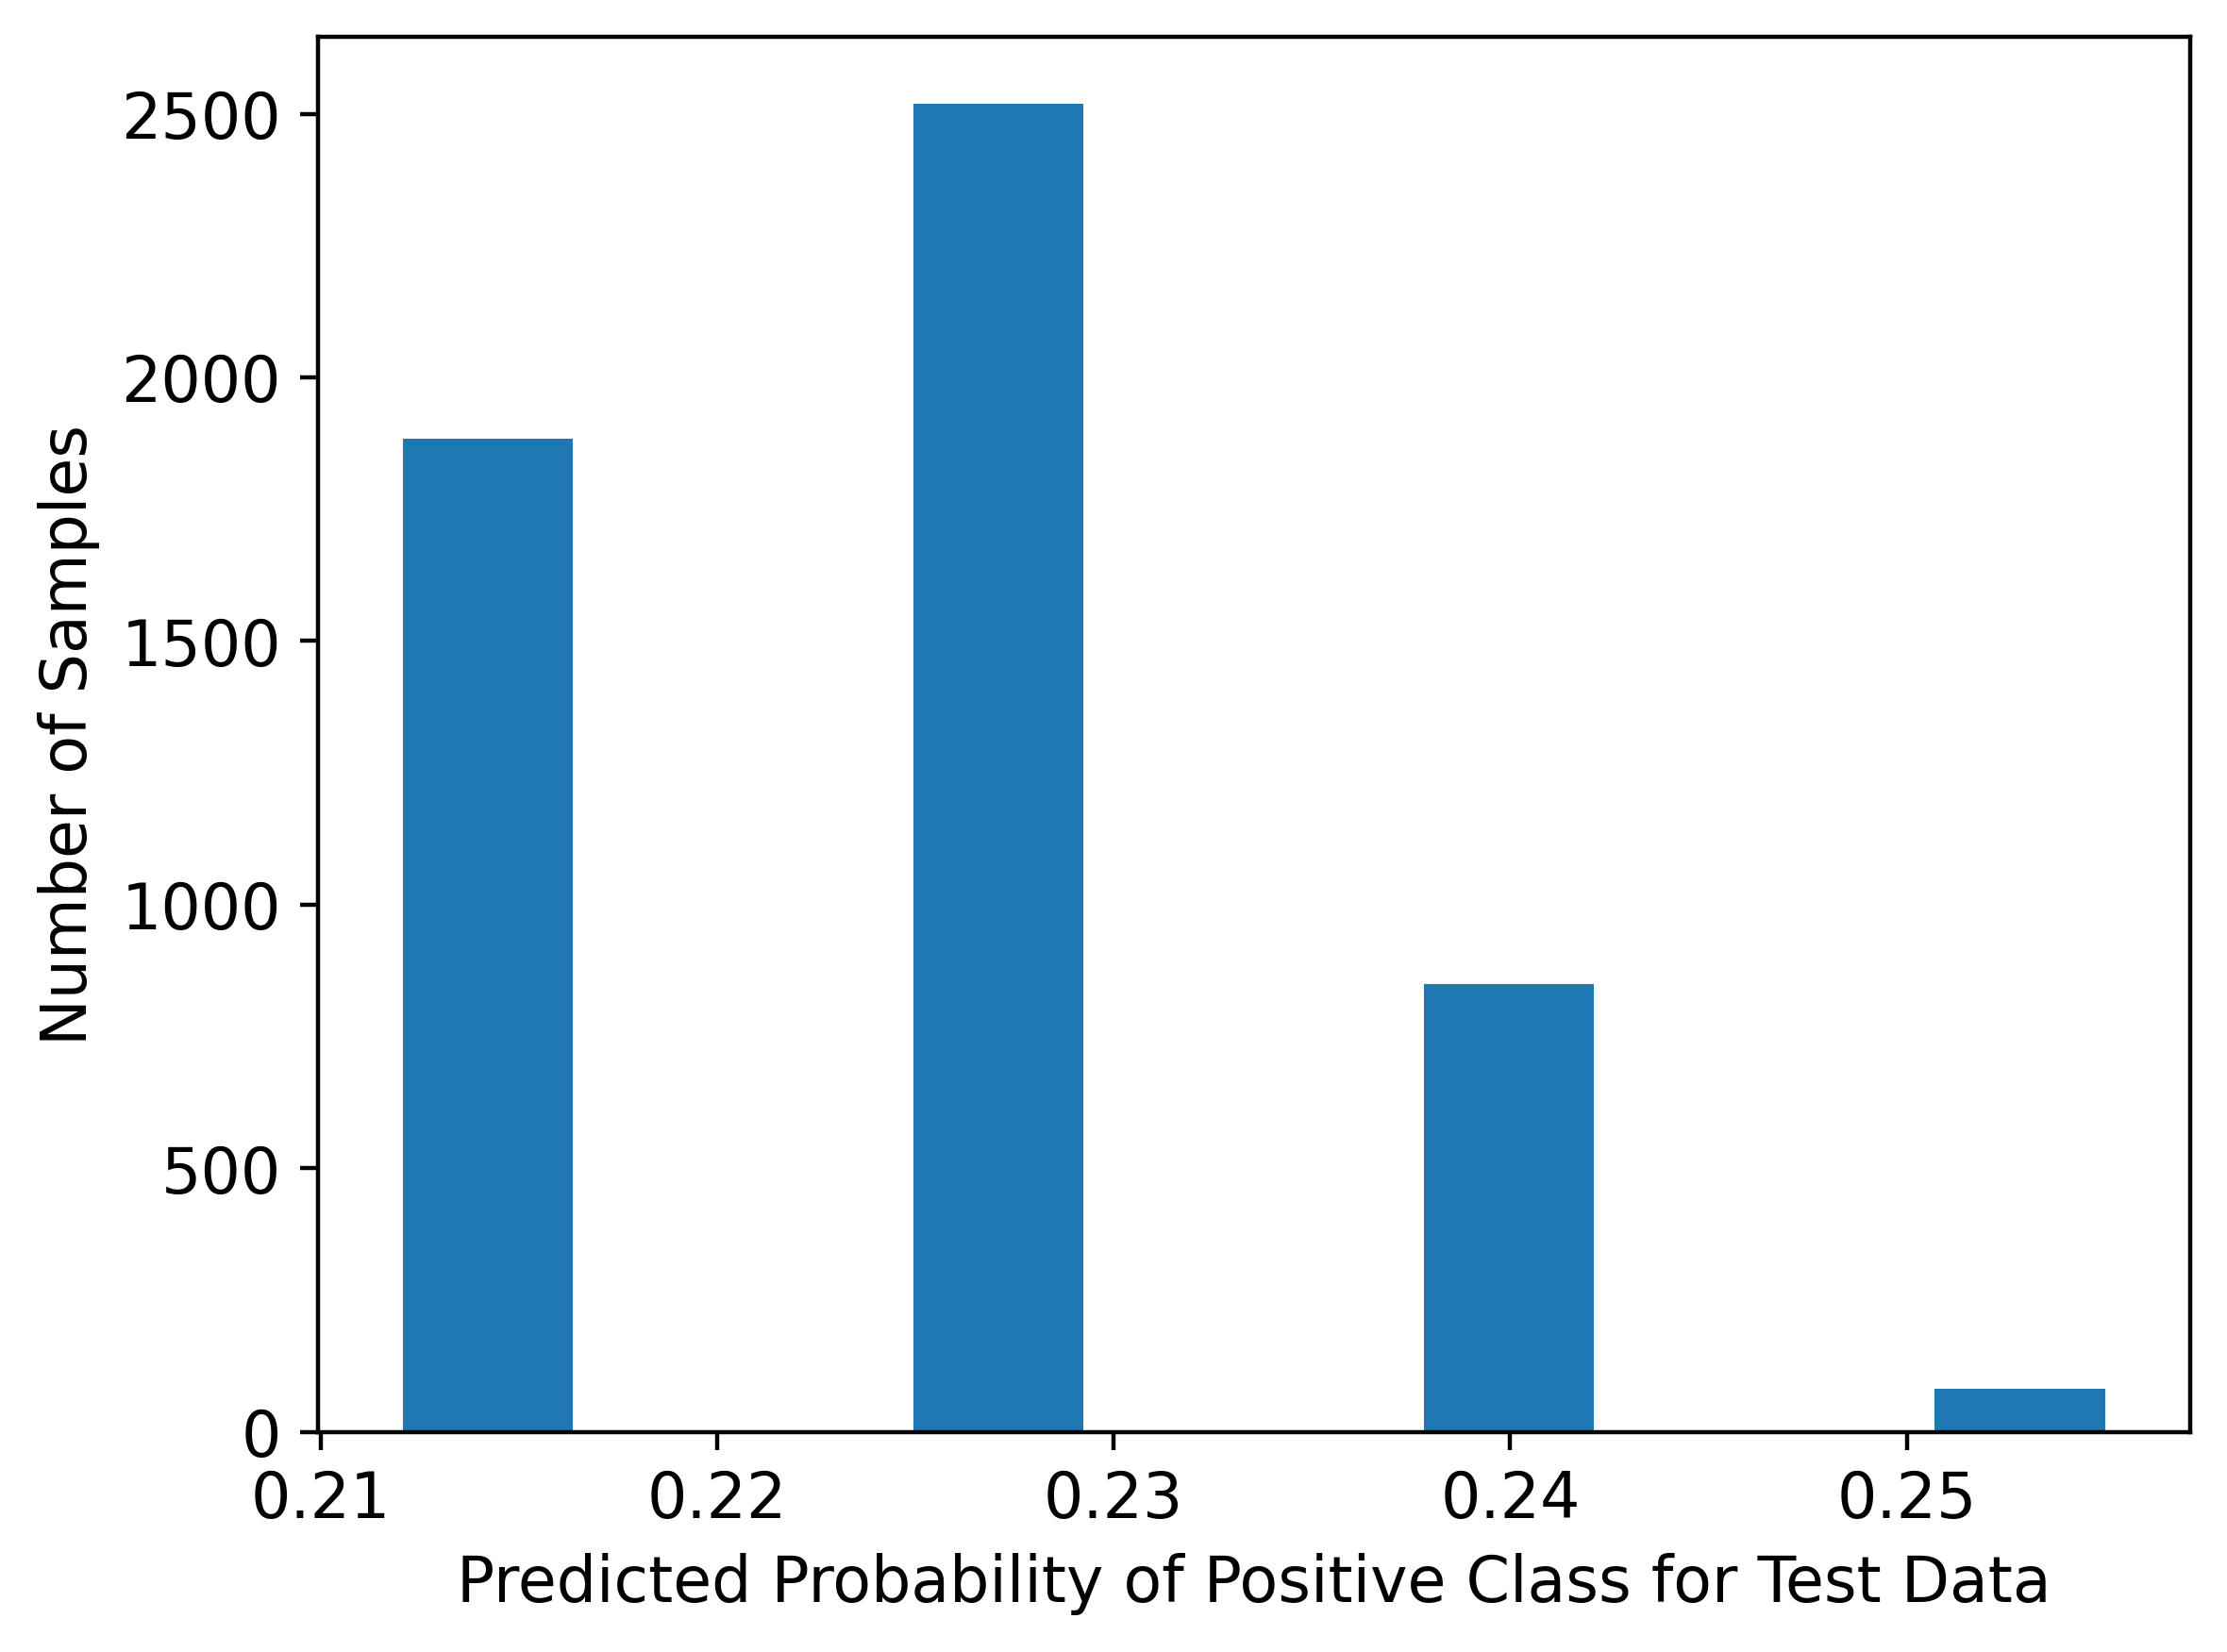

In [50]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted Probability of Positive Class for Test Data')
plt.ylabel('Number of Samples')

The probability is distributed in the value of 0.21 -> 0.25. That explain why all of the prediction is TN. We need to lower the threshold into those range of value for more accurate prediction. First, separate positive and negative samples.

In [51]:
# Separating positive and negative samples in the y_test
pos_sample_proba = pos_proba[y_test==1]
neg_sample_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Num of Samples')

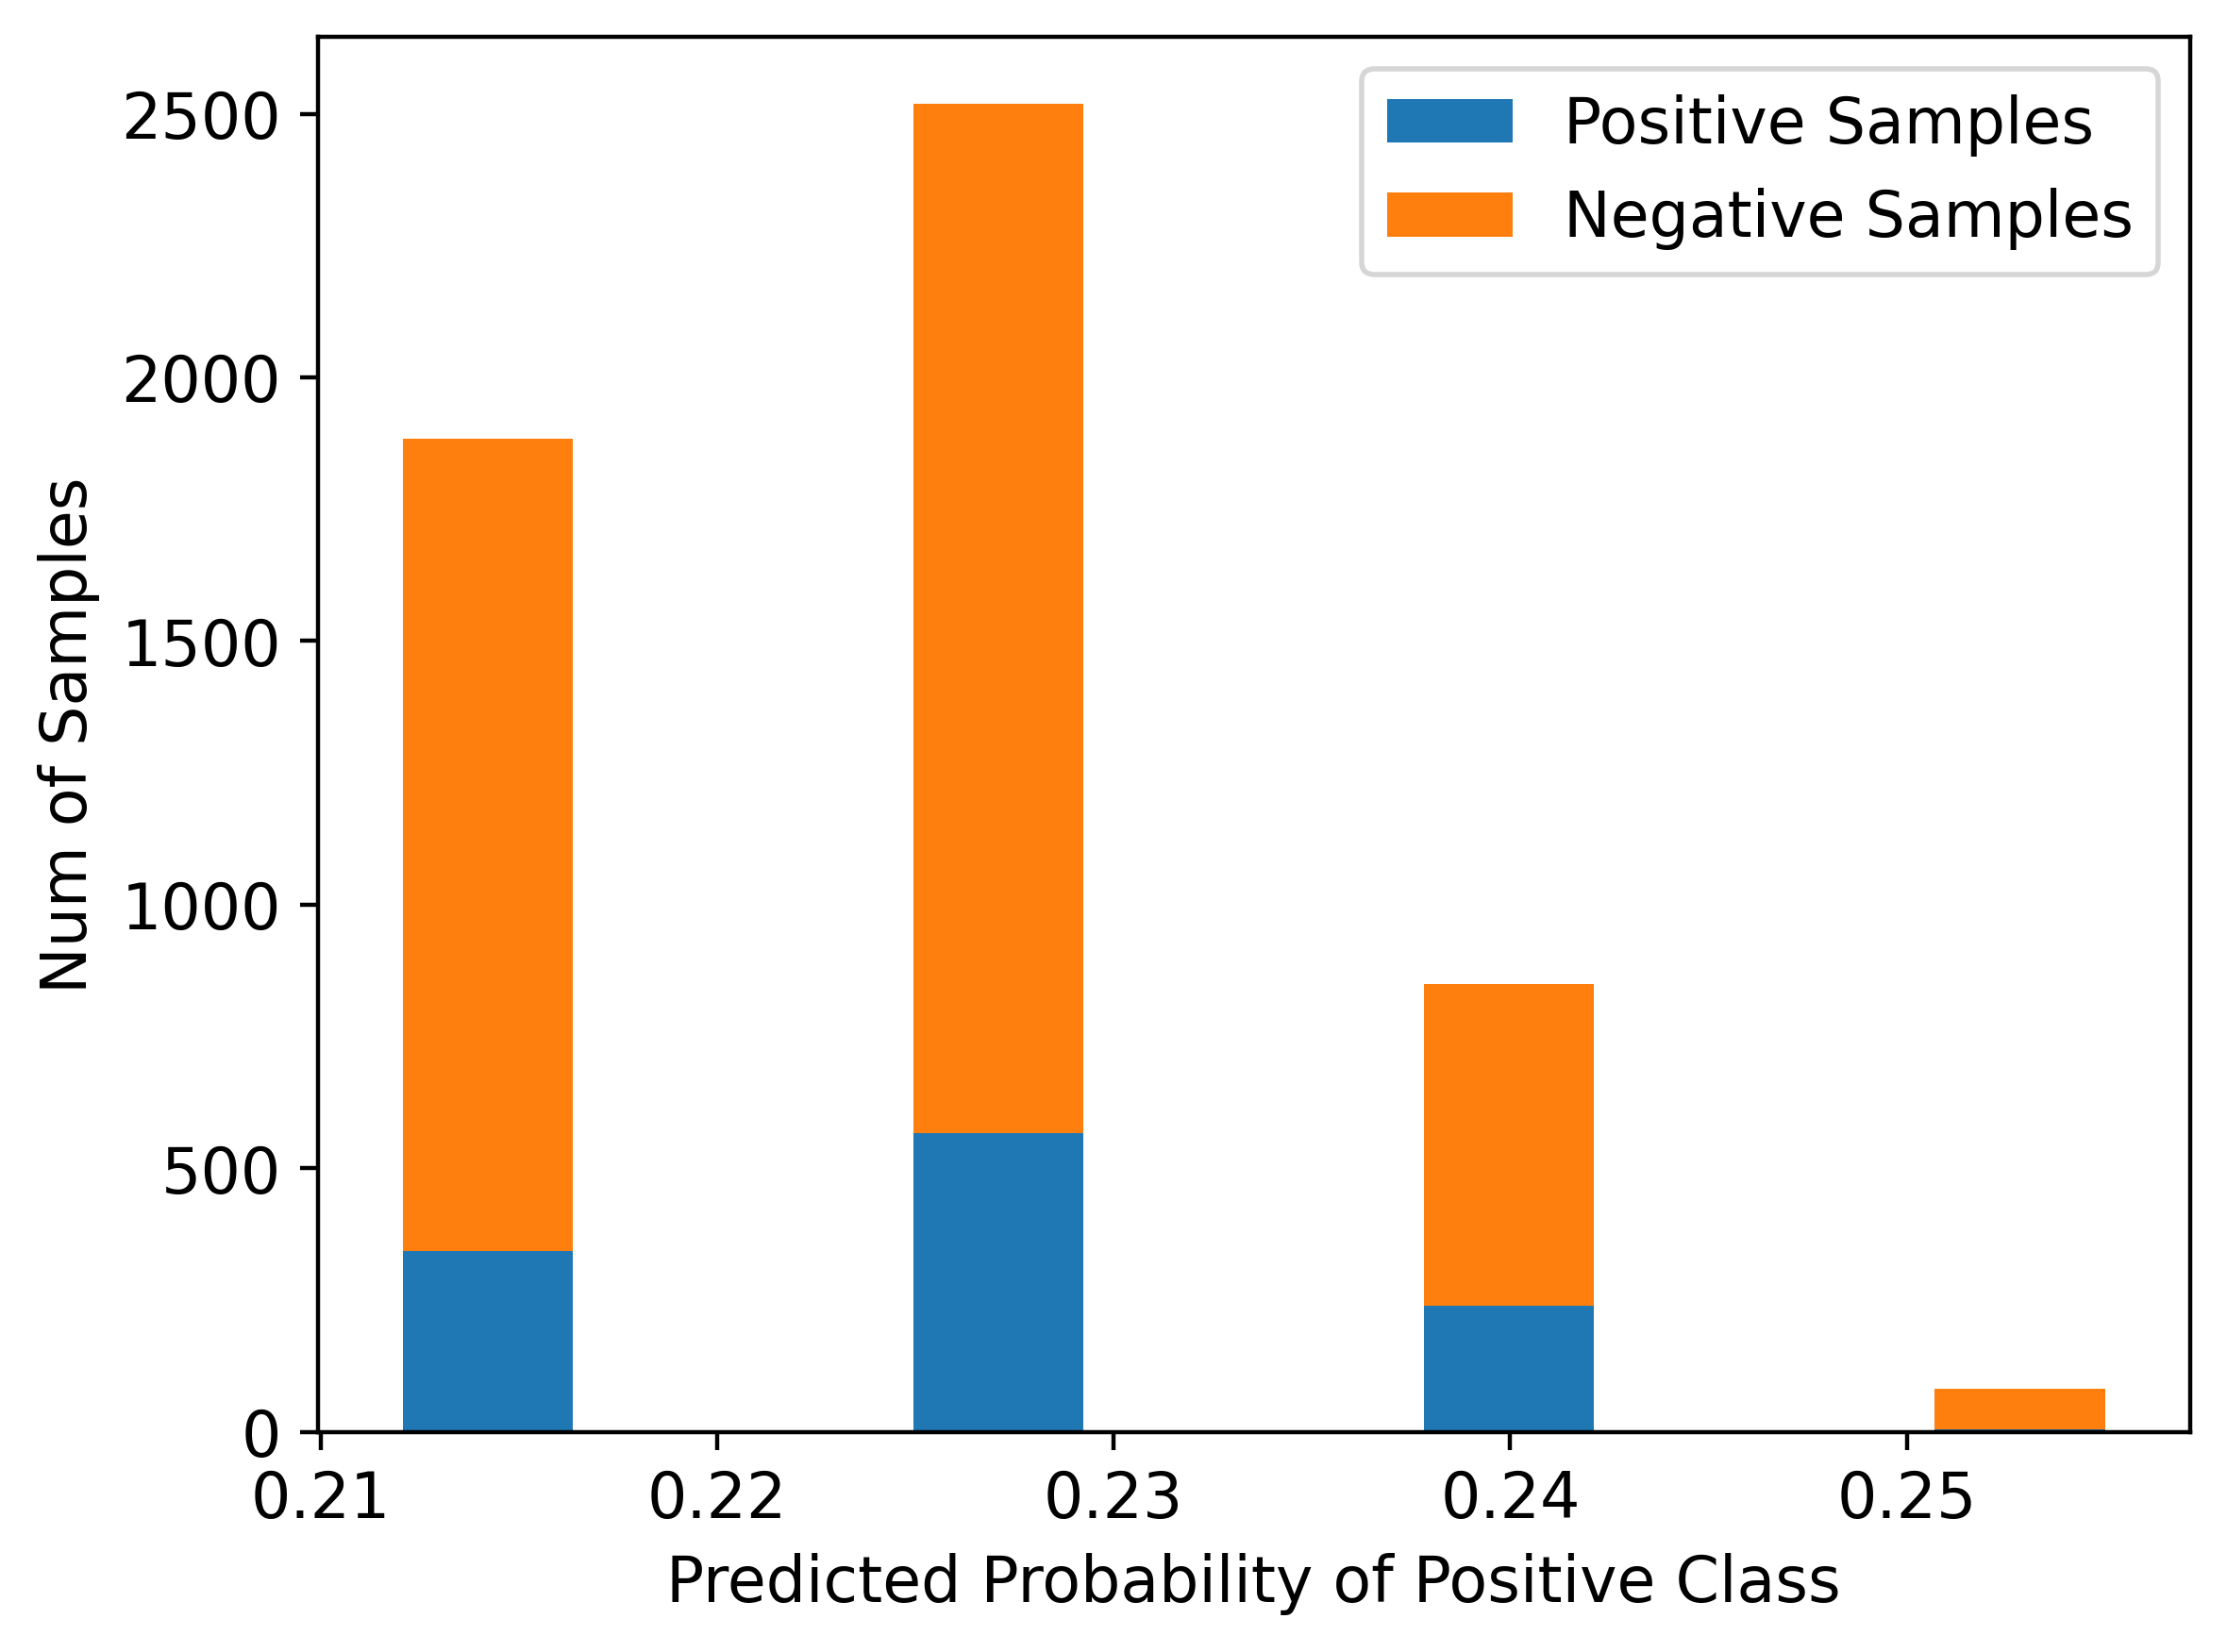

In [52]:
plt.hist([pos_sample_proba, neg_sample_proba], histtype='barstacked')
plt.legend(['Positive Samples', 'Negative Samples'])
plt.xlabel('Predicted Probability of Positive Class')
plt.ylabel('Num of Samples')

There is so many positive value that wrongly classified as negative. Therefore, lowering the threshold is a must.

**ROC (Receiver Operating Characteristic) Curve**

Use this to find the best threshold for your data

In [53]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC Curve')

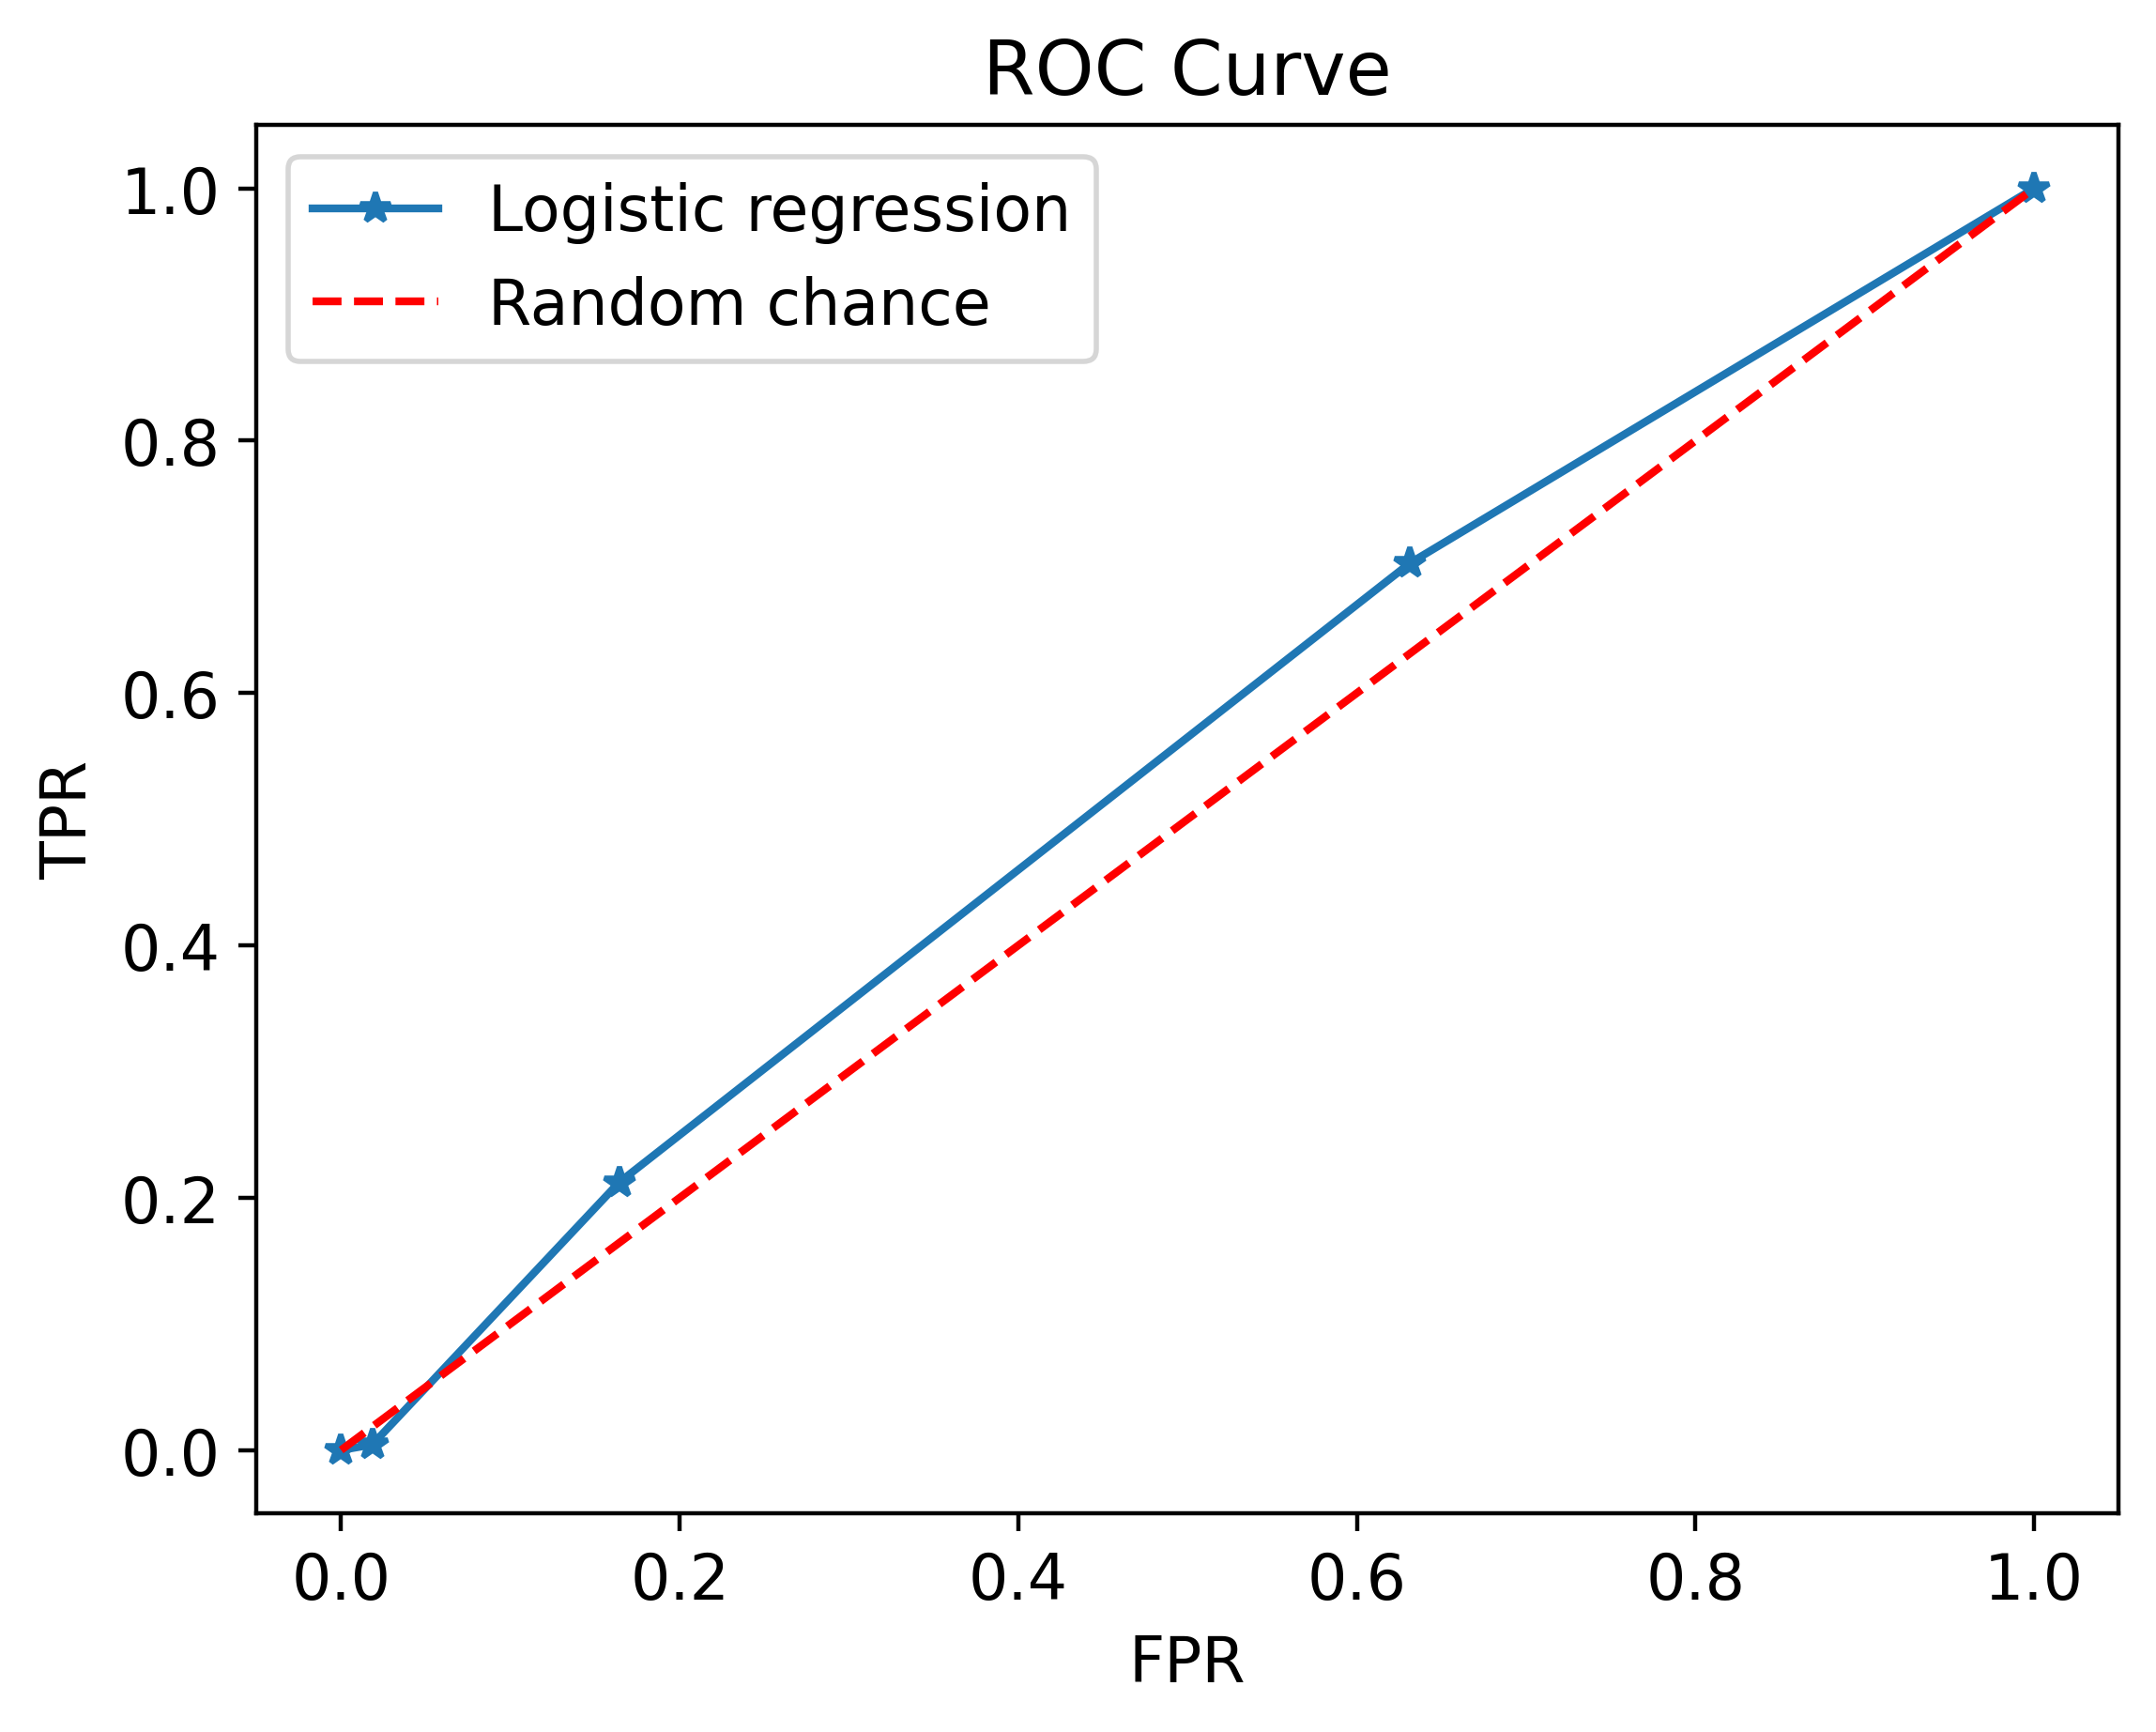

In [54]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

In [55]:
thresholds

array([       inf, 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [56]:
metrics.roc_auc_score(y_test, pos_proba)

np.float64(0.5434650477972642)

The best threshold is 0.54. This happen because we only use 1 feature (EDUCATION)

**Applying Logistic Regression into LIMIT_BAL Feature**

In [57]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df['LIMIT_BAL'].values.reshape(-1,1),
                                                        df['default payment next month'].values, test_size=0.2, random_state=24)

In [58]:
log_r.fit(X_train2, y_train2)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.1, multi_class='auto', solver='liblinear')

In [59]:
y_test2_proba = log_r.predict_proba(X_test2)

In [60]:
metrics.roc_auc_score(y_test2, y_test2_proba[:,1])

np.float64(0.6201990844642832)

In [61]:
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test2, y_test2_proba[:,1])

Text(0.5, 1.0, 'ROC Curve for Log Reg Model of LIMIT_BAL Feature')

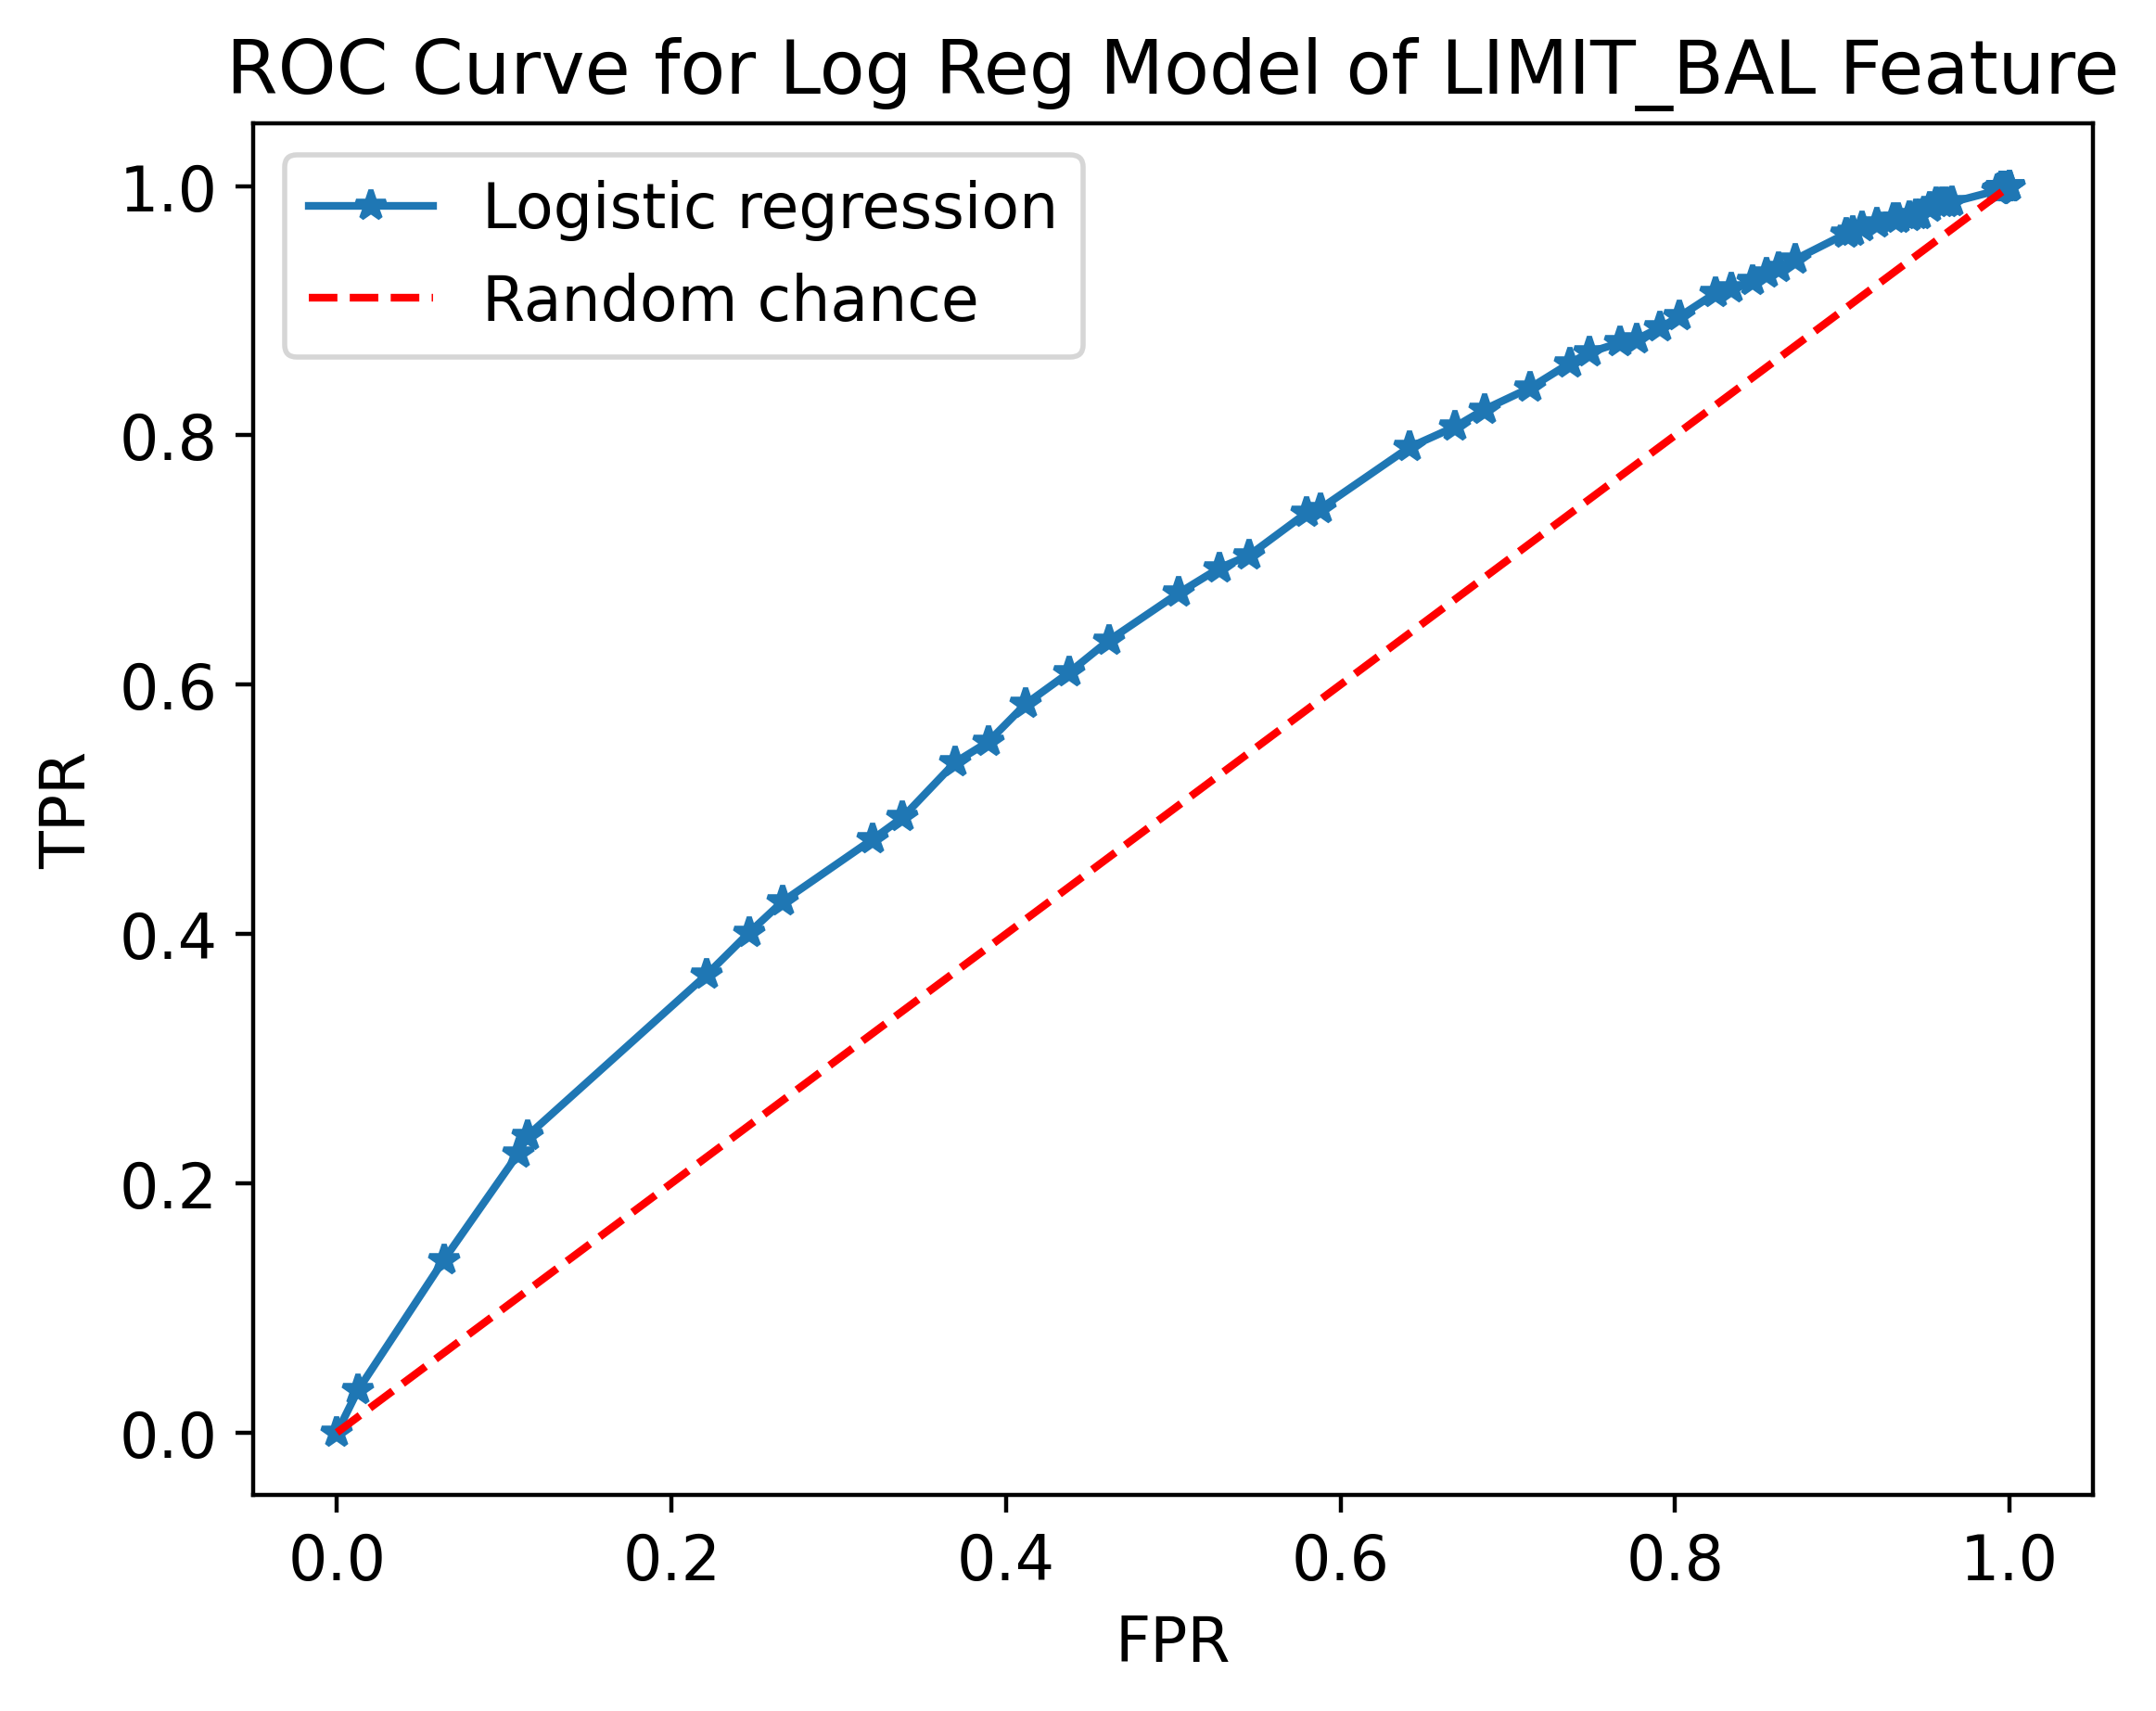

In [62]:
plt.plot(fpr2, tpr2, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Log Reg Model of LIMIT_BAL Feature')

In [63]:
pos = y_test2_proba[:,1]
pos

array([0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
       0.33606566])

In [64]:
pos_sam2 = pos[y_test2==1]
neg_sam2 = pos[y_test2==0]

Text(0, 0.5, 'Num of Samples')

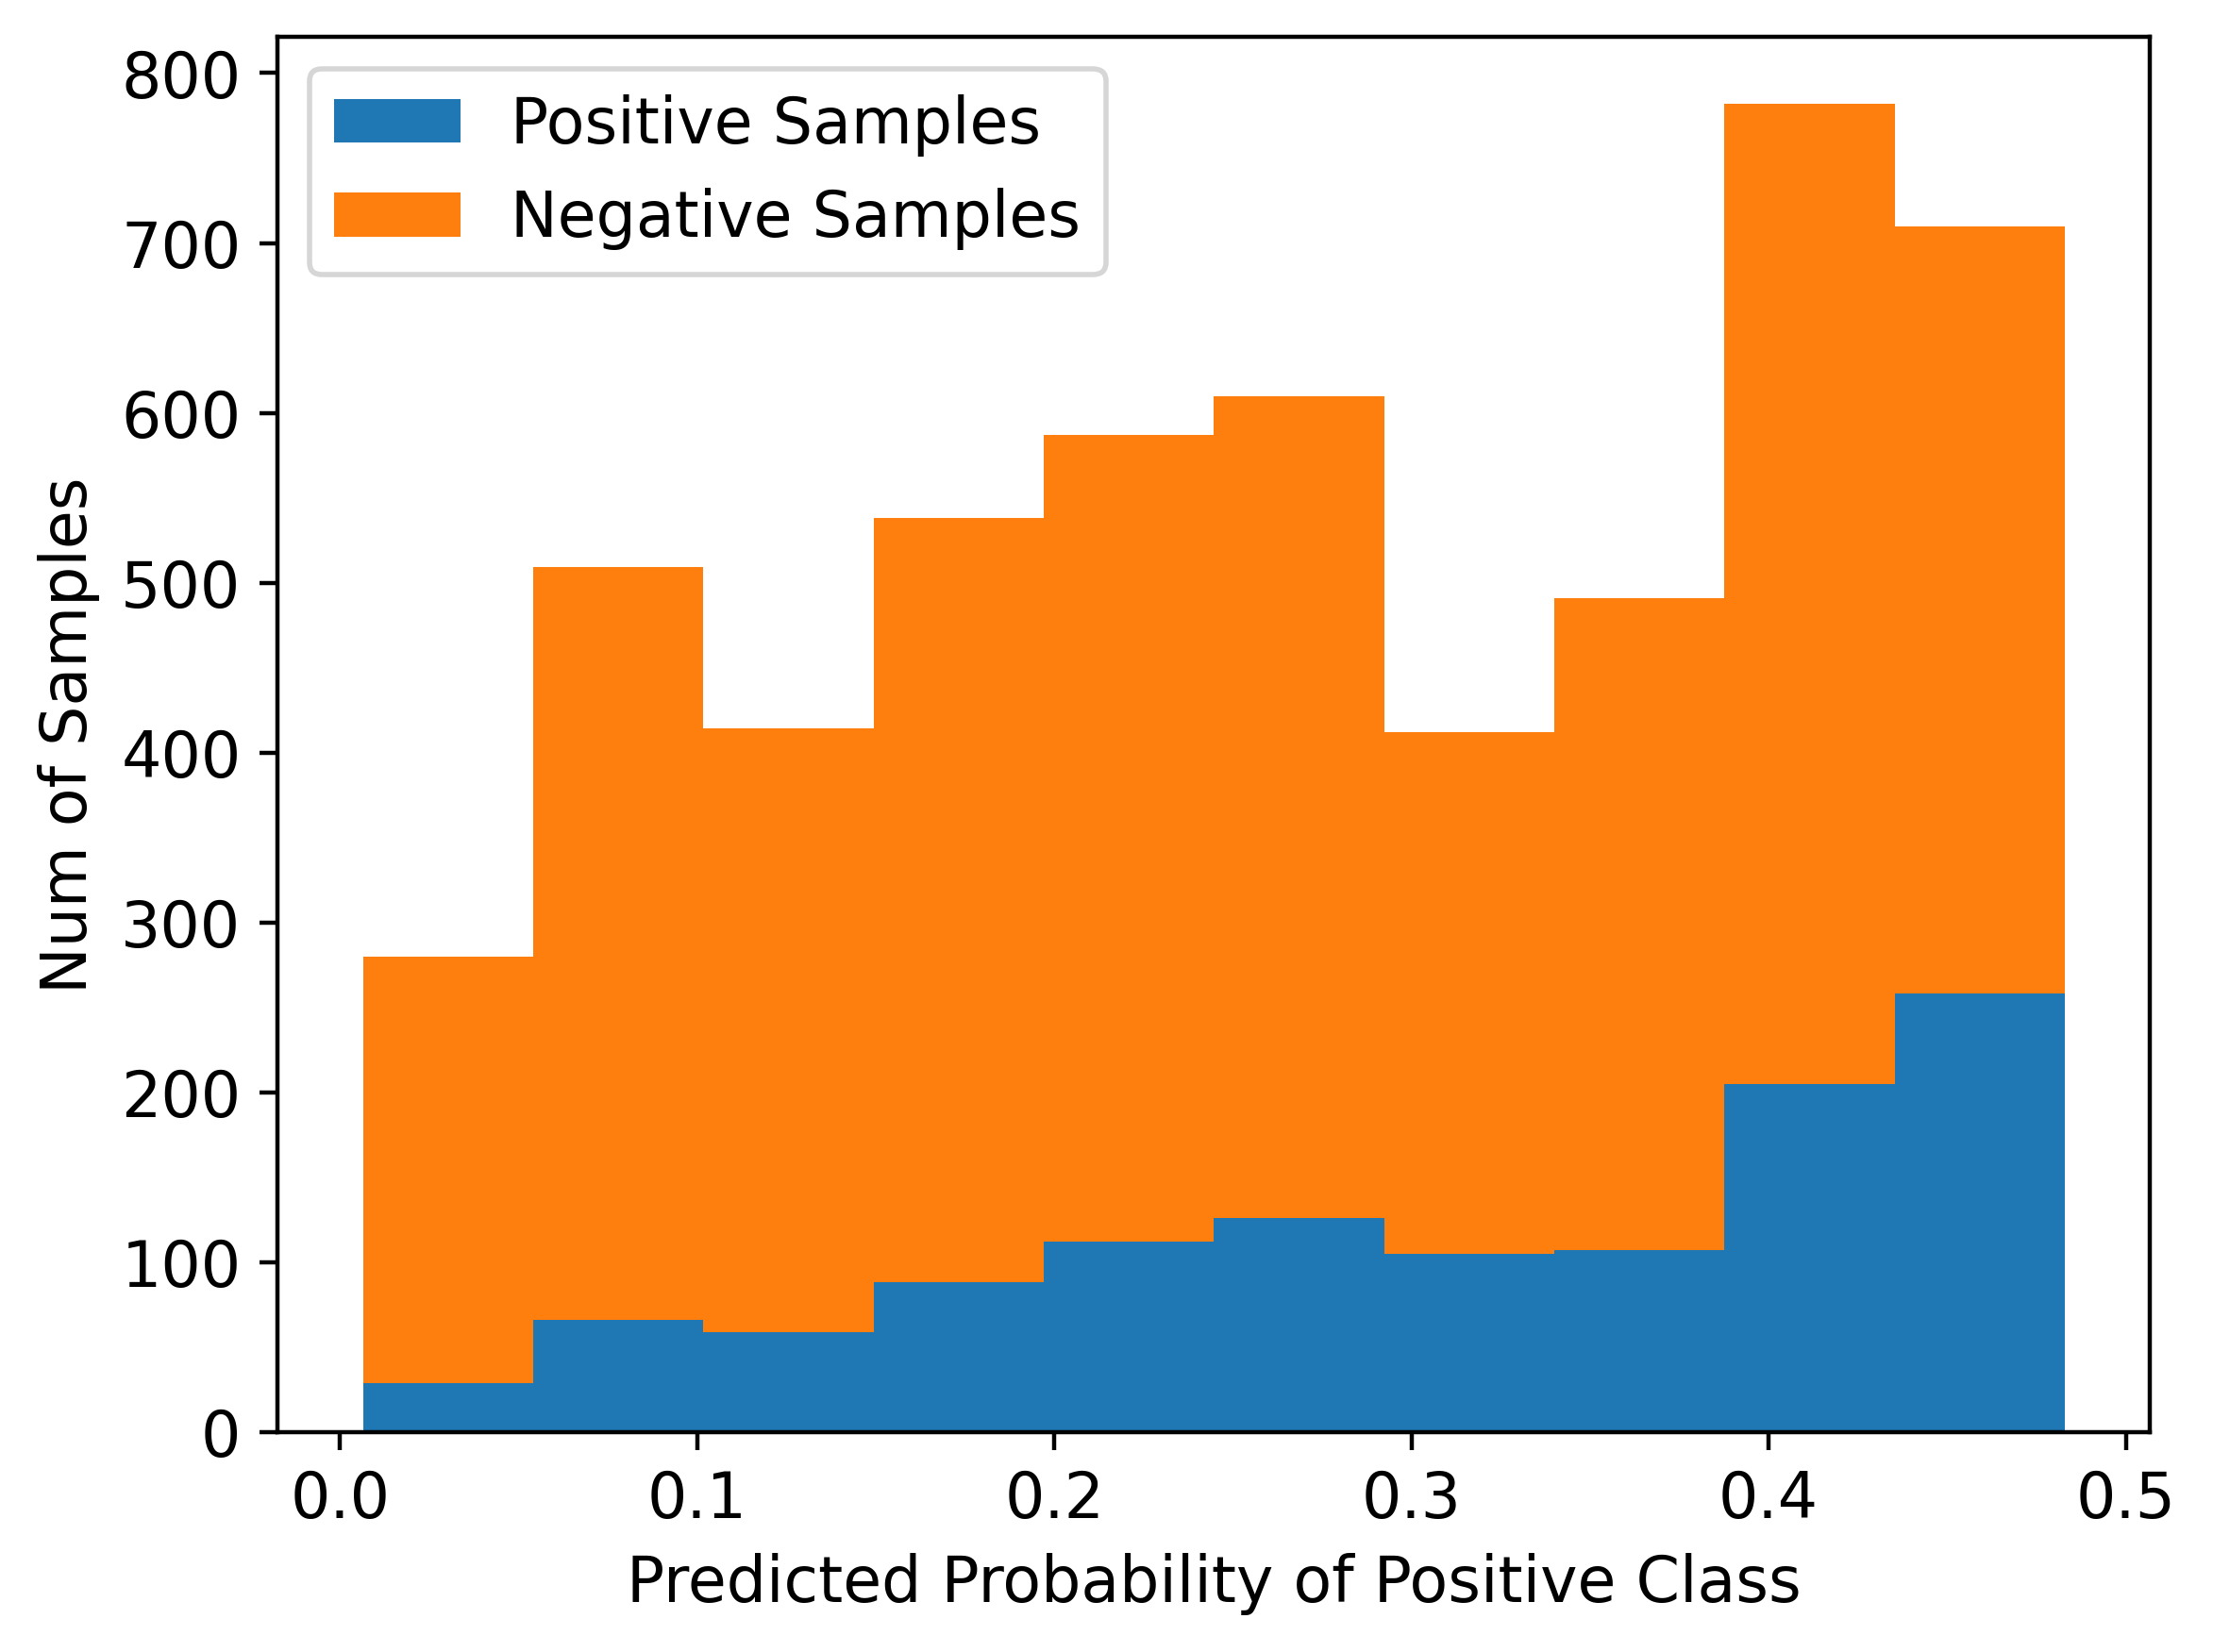

In [65]:
plt.hist([pos_sam2, neg_sam2], histtype='barstacked')
plt.legend(['Positive Samples', 'Negative Samples'])
plt.xlabel('Predicted Probability of Positive Class')
plt.ylabel('Num of Samples')

In [66]:
# Make Precision Curve
precision, recall, thresholds3 = metrics.precision_recall_curve(y_test2, y_test2_proba[:,1])

(0.0, 1.0)

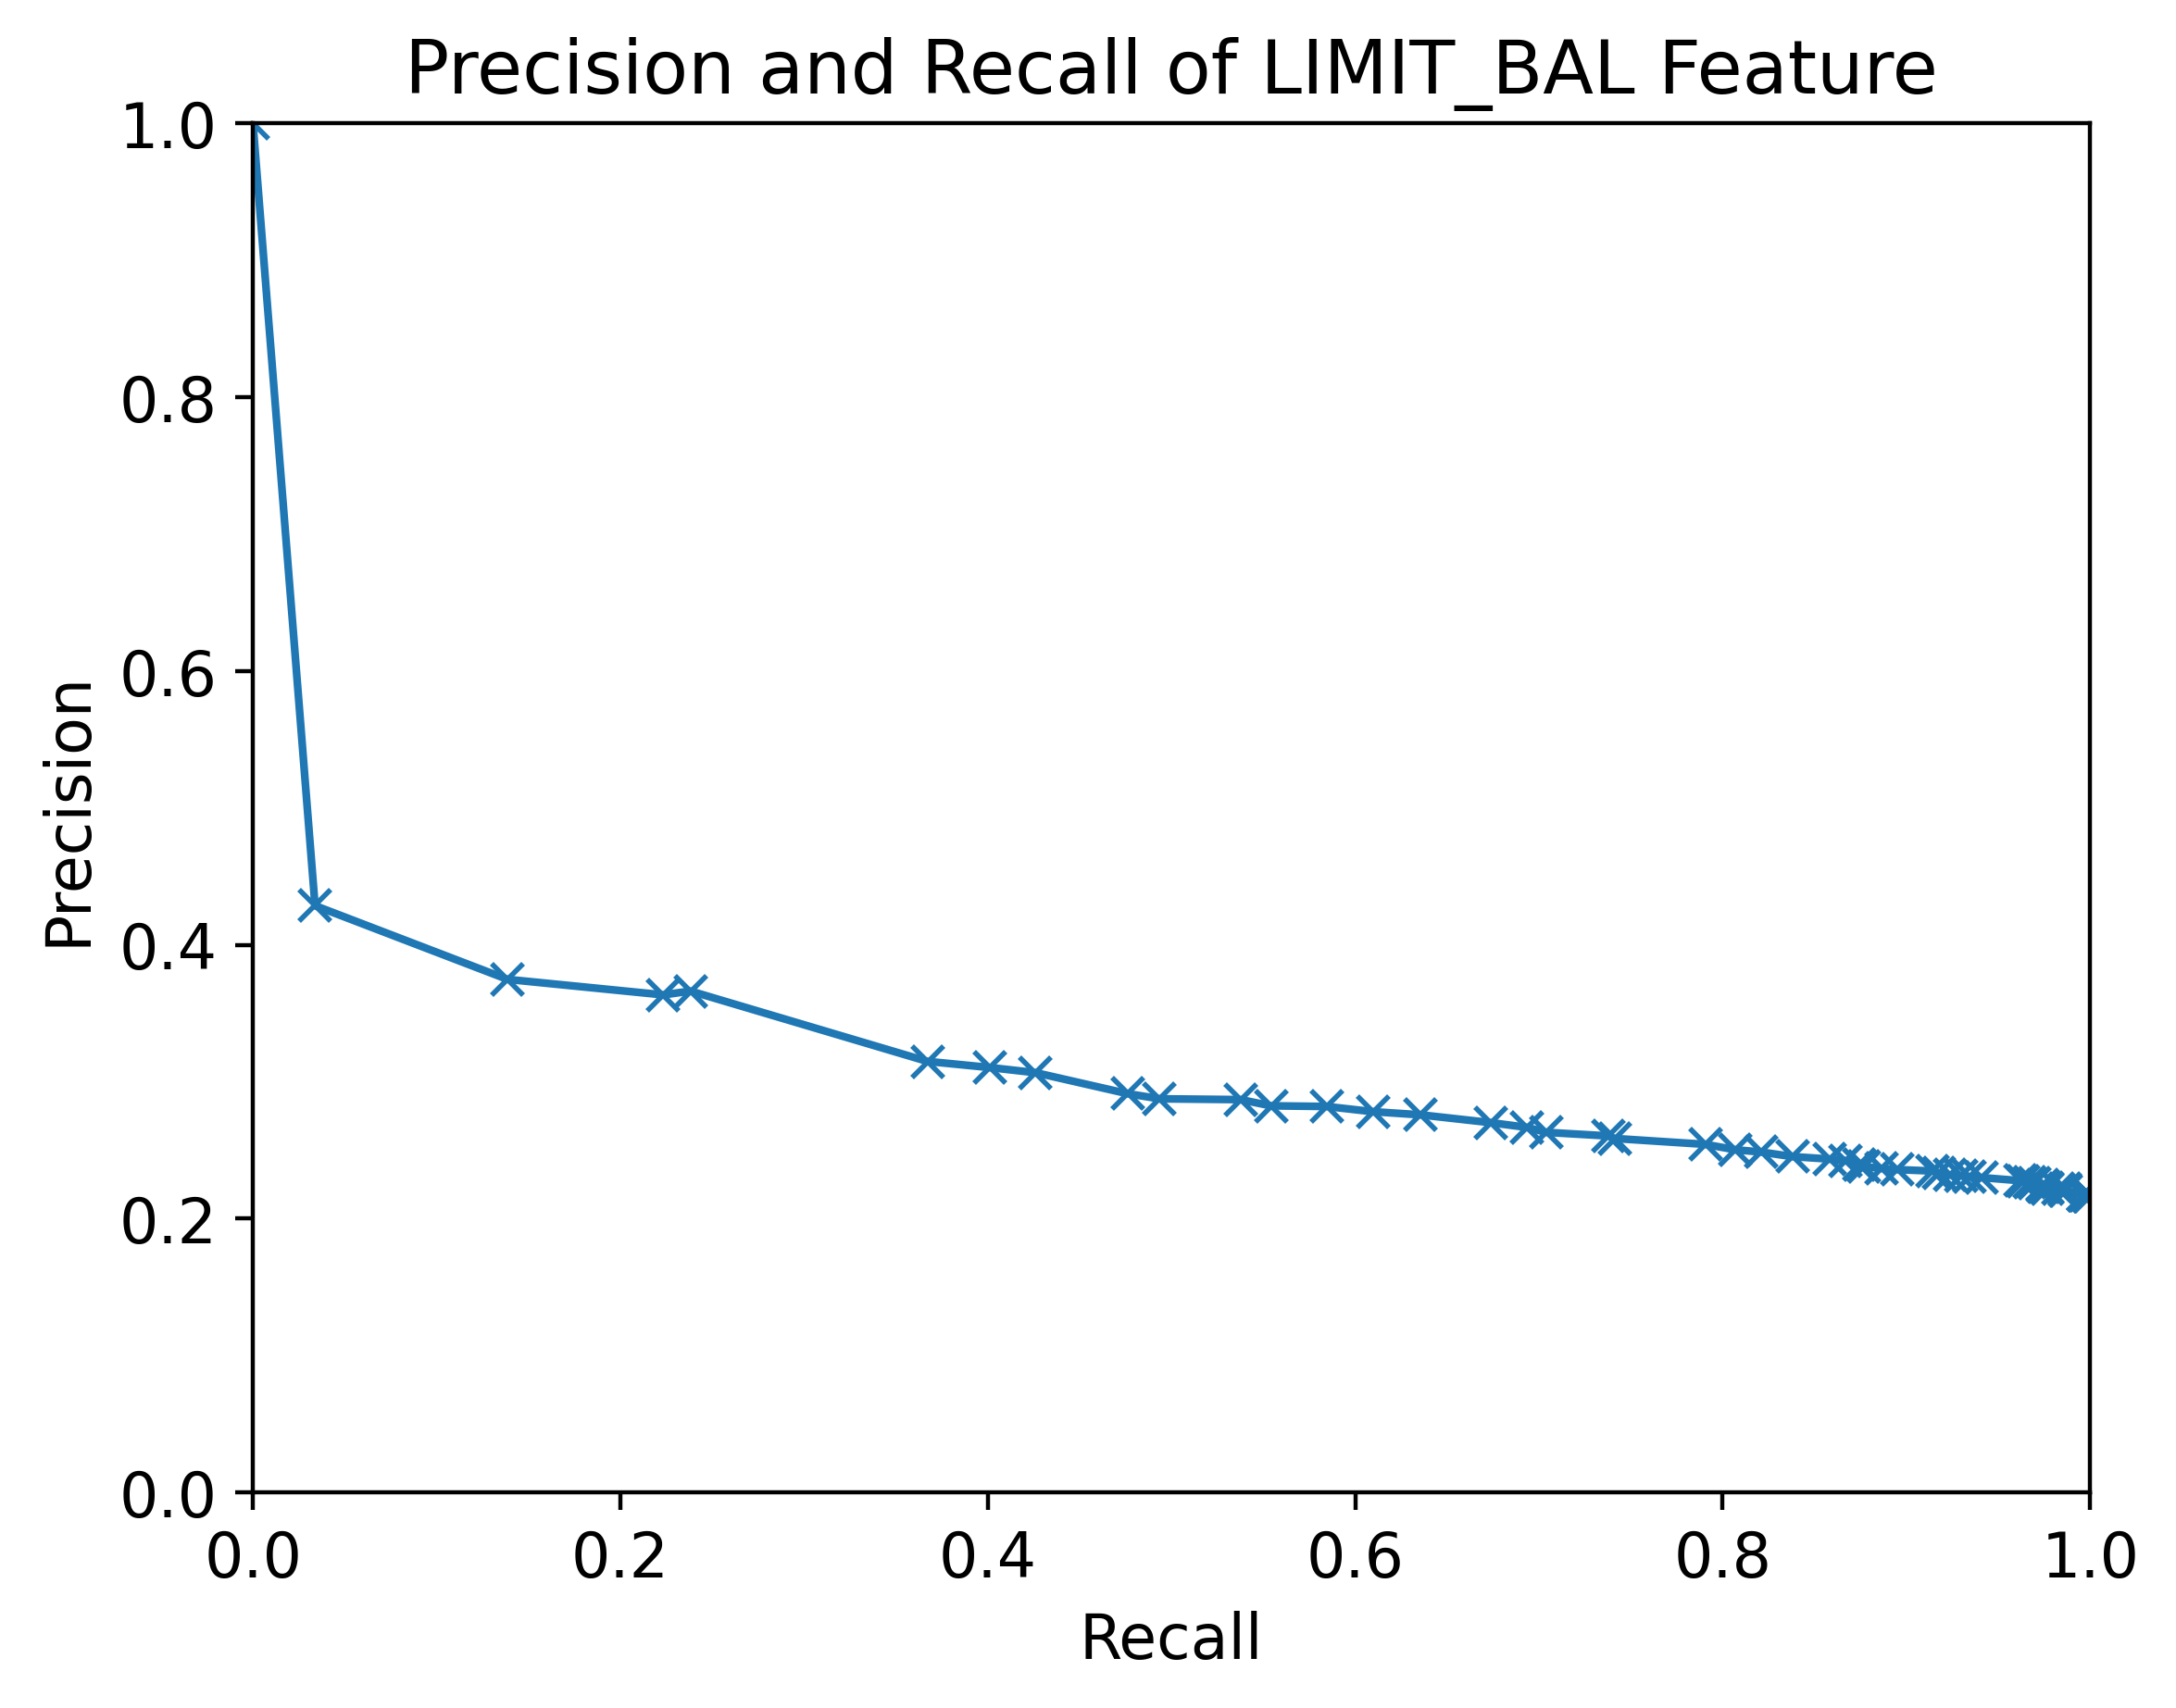

In [67]:
plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and Recall of LIMIT_BAL Feature')
plt.xlim([0, 1])
plt.ylim([0, 1])

The precision is quitely reduced as the number of recall increased.

In [68]:
metrics.auc(recall, precision)

np.float64(0.31566964427378624)

In [69]:
# Recalculate ROC_AUC
y_train2_proba = log_r.predict_proba(X_train2)

In [70]:
metrics.roc_auc_score(y_train2, y_train2_proba[:,1])

np.float64(0.6182918113358344)

The number is slightly reduced

So, apparently, accuracy is better metric to use in classifier model when the dataset is highly imbalanced.